proportion of overshoot: 0.6075
0.5014564163499973
0.28591489589589525
proportion of overshoot: 0.5725
0.49698532568941545
0.3157033298099252
proportion of overshoot: 0.58
0.530370451236978
0.26484210079624404
proportion of overshoot: 0.59
0.5280648418386455
0.2975056078568947
proportion of overshoot: 0.61
0.4958003917141234
0.29257422277647294


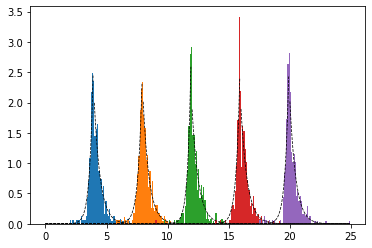

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

data = pickle.load(open('TSI07s05e1.pickle', 'rb'))
OriginalLengths = [4, 8, 12, 16, 20]
bins = np.arange(0, 25, 0.1)
ax = plt.gca()
for i in range(5):
    data0 = data[i]
    calledLength = data0['CalledLength']    
    pos = calledLength[calledLength > OriginalLengths[i]]
    neg = calledLength[calledLength < OriginalLengths[i]]
    print(f'proportion of overshoot: {len(pos)/len(calledLength)}')
    color = next(ax._get_lines.prop_cycler)['color']
    plt.hist(pos, zorder=2, density=True, bins=bins, color=color)
    plt.hist(neg, zorder=2, density=True, bins=bins, color=color)
    # plt.axvline(x=OriginalLengths[i], color='black', zorder=1, linewidth=0.75)
    # plt.axvline(x=np.mean(calledLength), color='black', zorder=1, linestyle='--', linewidth=0.75)

    ### fit a Gaussian dist? looks like a Gaussian fit is a bit too heavy tailed
    # mu = np.mean(calledLength)
    # sigma = np.std(calledLength)
    # print(f'mean overshoot: {mu-OriginalLengths[i]}')
    # plt.plot(bins, scipy.stats.norm.pdf(bins, loc=mu, scale=sigma), color='black', linestyle='--', linewidth=0.75)

    ######## try out exponential for pos and neg separately
    pos_lambda = np.mean(pos)-OriginalLengths[i]
    print(pos_lambda)

    neg_lambda = -(np.mean(neg)-OriginalLengths[i])
    print(neg_lambda)

    xs = np.arange(0, OriginalLengths[i], 0.1)
    plt.plot(xs, scipy.stats.expon.pdf(np.abs(xs-OriginalLengths[i]), loc=0.0, scale=neg_lambda), color='black', linestyle='--', linewidth=0.75)

    xs = np.arange(OriginalLengths[i], 25, 0.1)
    plt.plot(xs, scipy.stats.expon.pdf(np.abs(xs-OriginalLengths[i]), loc=0.0, scale=pos_lambda), color='black', linestyle='--', linewidth=0.75)


    

    plt.savefig(f'{OriginalLengths[i]}cM.png', dpi=300)

    #plt.clf()
plt.savefig(f'lengthBias.png', dpi=300)

In [13]:
CalledLength

array([ 8.7135002 ,  8.2686007 ,  7.77820349,  8.34599733,  8.2509011 ,
        8.57750177,  9.54149961,  7.98249245,  8.55650016,  8.05850029,
        8.08030367,  7.95869827,  8.79579931,  7.93009996,  8.16310644,
        8.12059641,  7.39270002,  8.42300057,  7.81130791,  8.54190588,
        7.98380077,  8.12169909,  7.77139664,  8.38439465,  7.44759925,
        7.26699829,  8.10600519,  8.1403017 ,  8.50099921,  8.05490017,
        8.12020302,  7.59680271,  7.97550082,  7.63660073,  8.31450224,
        6.47169352,  7.97859877,  8.74260068,  8.28980207,  7.77900219,
        8.32719952,  9.02259946,  8.86249542,  7.98460245,  7.94799924,
        8.2793951 ,  8.05519819,  8.02869797,  9.14770067,  7.96610117,
        8.56519938,  8.25430155,  8.13310146,  7.87100196,  7.92679787,
        8.97690058,  7.70449974,  8.29209685,  8.45500231,  7.63840675,
        8.33809972,  8.14940333,  9.44370031,  7.40760565,  9.25630033,
        8.74100327,  9.07030106,  7.73509741,  7.62079954,  7.34